In [132]:
# Environment Check -- Deactivate on a working host
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/opt/jupyterhub/bin/python3
3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)



Copyright © DATE Author, *all rights reserved*

# Transporting Wind Turbine Blades

Consider the transport of Turbine Blades, they are rather long, and often the transport compaines have to navigate difficult turns as in Figure 1.

![https://www.doll.eu/fileadmin/_processed_/2/b/csm_Transport_2_09ee9bf954.jpg](https://www.doll.eu/fileadmin/_processed_/2/b/csm_Transport_2_09ee9bf954.jpg)

Consider route planning using a simple case:

Two intersecting mountain road cuts (think of vertical walls) meet at an angle of 123$^o$, as shown in Figure 2.  The East-West road is 7 feet wide, while the Southwest-Northeast road is 9 feet wide.  What is the longest blade that can negotiate the turn?  You can neglect the blade thickness (think of it as a line segment) and cannot tip it to make it through the corner.  Build a tool (solution script) that can allow for general use where the angle $A$ is variable as are the road widths.

![mountain-cut.png](mountain-cut.png)

## Analysis

Visualize the turbine blade in sucessive positions as we transport it around the corner; there will be some critical position where each end touch the road cut walls while a point on the blade touches the corner of the intersection.

![turn-analysis.png](turn-analysis.png)

If we analyze the various triangles formed by the turbine blade we can express the lengths in terms of the widths and angles.

For the part of the blade on the East-West portion we obtain:

$$ l_1 = \frac{w_2}{sin(B)}$$

For the part of the blade on the Southeast-Northwest portion we obtain:

$$ l_2 = \frac{w_1}{sin(C)}$$

The angles are related as:

$$ B = \pi - A - C $$

And the turbine total length is:

$$ l = l_1 + l_2 = \frac{w_2}{sin(B)} + \frac{w_1}{sin(C)}$$

Substitute our expression for $B$, and we have everything in terms on road widths, and intersection angle:

$$ l =  \frac{w_2}{sin(\pi - A - C)} + \frac{w_1}{sin(C)}$$

Now we want to find the smallest $l$ as a function of $C$, the necessary condition for such a minimum is

$$\frac{dl}{dC}=0$$

which by application of Calculus produces:

$$\frac{dl}{dC}=\frac{w_2 cos(\pi - A - C)}{sin^2(\pi - A - C)} - \frac{w_1 cos(C)}{sin^2(C)}=0 $$

where $A$, $w_1$, and $w_2$ are known, now we have to find a solution to this equation. and once we have found the value of $C$ that satisfies $\frac{dl}{dC}=0$ we can recover the length from

$$ l =  \frac{w_2}{sin(\pi - A - C)} + \frac{w_1}{sin(C)} $$

Lets consider some methods to find the length:

1. Plot the function, find the value from the plot
2. Apply a search method (grid searching) 
3. Newton's method (with finite difference approximations to derivative)




In [191]:
# Plot the function, find the value from the plot

## forward define prototype functions 

# Our plotting function
import matplotlib.pyplot as plt
def makeAplot(listx1,listy1,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=1) # basic data plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.title(strtitle)
    plt.show()
    
# prototype dl/dC function
import math
def func(x):
    # x is angle C in radians
    global w1,w2,A
    # w1,w2 are road cut widths, A is angle in radians; GLOBAL DEFINE
    numer1 =w2*math.cos(math.pi - A - x)
    denom1 = math.sin(math.pi - A - x)**2
    numer2 = w1*math.cos(x)
    denom2 = math.sin(x)**2
    func = numer1/denom1 - numer2/denom2
    return(func)

# prototype length function
def blade_length(x):
    # x is angle C in radians
    global w1,w2,A
    # w1,w2 are road cut widths, A is angle in radians; GLOBAL DEFINE
    numer1 = w2
    denom1 = math.sin(math.pi - A - x)
    numer2 = w1
    denom2 = math.sin(x)
    blade_length = numer1/denom1 + numer2/denom2
    return(blade_length)

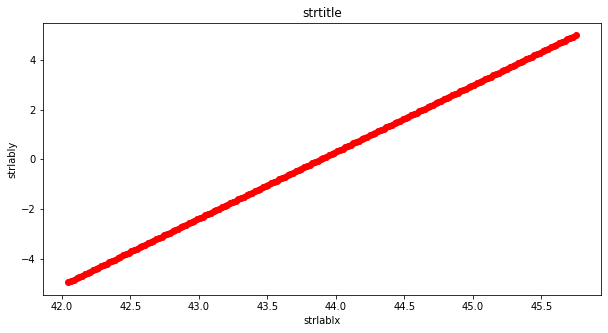

In [193]:
# Plot the function

c_angle = [] # empty list to populate
f_value = [] # empty list to populate

# set problem constants
A = 90.1 # intersection angle in degrees
Cm = 180 - A # biggest C angle in degrees
A = A * (1/180.00)*math.pi  # intersection angle in radians
w1 = 17.0 #road cut width in feet
w2 = 19.0 #road cut width in feet

stepsize = 0.01 # increments of angle (degrees)
total_steps = int(Cm/stepsize)
tolerance = 5 # Only save a result close to the zero

for i in range(1,total_steps):
    test_angle = float(i)*math.pi/total_steps
    test_value = func(test_angle)
    if abs(test_value) <= tolerance:
        c_angle.append((test_angle*180)/math.pi) # angle in degrees
        f_value.append(test_value) # value of dl/dC function
#        print((test_angle*180)/math.pi,test_value) # activate to examine values

makeAplot(c_angle,f_value,'strlablx','strlably','strtitle')

In [196]:
# Now get the length from our best guess from plot; trial and error to refine guess
visual_angle = 43.888 # based on eyeball fit!
print('Maximum blade length for C angle of ',round(visual_angle,1),' degrees is ',round(blade_length(visual_angle*math.pi/180.),3),' feet')
print(' dl/dC function target is zero; current value is ',round(func(visual_angle*math.pi/180.),3))

Maximum blade length for C angle of  43.9  degrees is  50.93  feet
 dl/dC function target is zero; current value is  -0.002


## Grid Search

Describe method then show example


In [197]:
# Apply a search method
    
# set problem constants
A = 90.1 # intersection angle in degrees
Cm = 180 - A # biggest C angle in degrees
A = A * (1/180.00)*math.pi  # intersection angle in radians
w1 = 17.0 #road cut width in feet
w2 = 19.0 #road cut width in feet

tolerance = 0.01 # define close enough to zero
stepsize = 0.001 # increments of angle (degrees)
total_steps = int(Cm/stepsize)
best_size = 1e9

for i in range(1,total_steps):
    test_angle = float(i)*math.pi/total_steps
    test_value = func(test_angle)
    if abs(test_value) <= tolerance: # are we close to zero?
        if abs(test_value) < best_size: # are better than last close to zero?
            best_size = abs(test_value)
            best_angle = test_angle
#            print(float(i),test_value,best_size)
    else:
        pass
#print(((best_angle*180)/math.pi),best_size)
# Now report values
print('Searched ',total_steps,' interference angles in steps of ',stepsize,' degrees of arc')
print('   Lower C angle ',round(float(1)*math.pi/total_steps,3),'degrees of arc')
#print(' Blade Length to Fit Intersection is ',round(blade_length(float(1)*math.pi/total_steps),3),' feet')
print('   Upper C angle ',round(Cm,3), 'degrees of arc')
print('Best C angle    ',round(((best_angle*180)/math.pi),3), 'degrees of arc')
print('Longest Blade Length to Fit Intersection is ',round(blade_length(best_angle),3),' feet')


Searched  89900  interference angles in steps of  0.001  degrees of arc
   Lower C angle  0.0 degrees of arc
   Upper C angle  89.9 degrees of arc
Best C angle     43.889 degrees of arc
Longest Blade Length to Fit Intersection is  50.93  feet


# Single Variable Newtons Method
Newton's method is an iterative technique that can produce good estimates of solutions to implicit equations. The method is employed by rewriting the equation in the form `f(x) = 0`,
then successively manipulating guesses for `x` until the function evaluates to a value close
enough to zero for the modeler to accept.In the turbine blade case the $\frac{dl}{dC}=0$ function is already in the correct form.

## Background

   ![figure](newton1.png)

The figure above is a graph of some function whose intercept with the `x-axis` is unknown. The goal
of Newton's method is to find this intersection (root) from a realistic first guess. Suppose
the first guess is `x1`, shown on the figure as the right-most specific value of `x`. The value
of the function at this location is `f(x1)`. Because `x1` is supposed to be a root the difference
from the value zero represents an error in the estimate. Newton's method simply provides a
recipe for corrections to this error.

Provided `x1` is not near a minimum or maximum (slope of the function is not zero) then a
better estimate of the root can be obtained by extending a tangent line from `x1, f(x1)` to
the `x-axis`. The intersection of this line with the axis represents a better estimate of the
root.  This new estimate is `x2`. A formula for `x2` can be derived from the geometry of the triangle
`x2,f(x1),x1`. Recall from calculus that the tangent to a function at a particular point is
the first derivative of the function. Therefore, from the geometry of the triangle and the
definition of tangent we can write, 

\begin{equation}
tan(\theta)=\frac{df}{dx}\Biggr\vert_{x_1} = \frac{f(x_1)}{x_1 - x_2}
\end{equation}

Solving the equation for `x`2 results in a formula that expresses `x2` in terms of the first guess
plus a correction term.

\begin{equation}
x_2=x_1 - \frac{f(x_1)}{\frac{df}{dx}\vert_{x_1}} 
\end{equation}

The second term on the right hand side is the correction term to the estimate on the right
hand side. Once `x2` is calculated we can repeat the formula substituting `x2` for `x1` and `x3` for
`x2` in the formula. Repeated application usually leads to one of three outcomes:
1. a root;
2. divergence to +/- $\inf$ ; or
3. cycling.

These three outcomes are discussed below in various subsections along with some remedies.
The generalized formula is

\begin{equation}
x_{k+1}=x_{k} - \frac{  f(x_{k})  }{   \frac{df}{dx}\rvert_{x_k} } 
\label{eqn:NewtonFormula}
\end{equation}

If the derivative is evaluated using analytical derivatives the method is called Newton's
method, if approximations to the derivative are used, it is called a quasi-Newton method.

## Newton's Method --- Using analytical derivatives
This subsection is an example in Python of implementing Newton's method with analytical derivatives.   

The recipe itself is:

1. Write the function in proper form, and code it into a computer.
2. Write the derivative in proper form and code it into a computer.
3. Make an initial guess of the solution (0 and 1 are always convenient guesses).
4. Evaluate the function, evaluate the derivative, calculate their ratio.
5. Subtract the ratio from the current guess and save the result as the update.
6. Test for stopping:
  1. Did the update stay the same value? Yes, then stop, probably have a solution.
  2. Is the function nearly zero?  Yes, then stop we probably have a solution.
  3. Have we tried too many updates? Yes, then stop the process is probably cycling, stop.
7. If stopping is indicated proceed to next step, otherwise proceed back to step 4.
8. Stopping indicated, report last update as the result (or report failure to find solution), and related information about the status of the numerical method.


The following example illustrates these step as well as an ipython implementation of Newton's method.

Suppose we wish to find a root (value of `x`) that satisfies:

\begin{equation}
f(x) = e^x - 10 cos(x) -100
\end{equation}

Then we will need to code it into a script.   Here is a code fragment that will generate the prototype function

In [137]:
#  import built in function for e^x, cosine
from math import exp, cos, sin
# Define the function
def func(x):
    func = exp(x) - 10*cos(x) - 100  #using the name as the temp var
    return func

Notice in the code fragment we import three built-in functions from the Python math package, specifically $\exp()$, $\sin()$, and $\cos ()$.
The next step is to code the derivative.   In this case the derivative is 

\begin{equation}
\frac{df}{dx}\vert{(x)} = e^x + 10 \sin(x)
\end{equation}

and the prototype function is coded as 

In [138]:
def dfdx(x):
    dfdx = exp(x) + 10*sin(x)
    return dfdx

Next we will need script to read in an initial guess, and ask us how many trials we will use to try to find a solution, as well as how close to zero we should be before we declare victory.

In [139]:
# Now for the Newton Method Implementation
# Get initial guess, use a simple error trap
yes=0
while yes == 0:
    xnow = input("Enter an initial guess for Newton method \n")
    try:
        xnow = float(xnow)
        yes =1
    except:
        print ("Value should be numeric, try again \n")
# Get number trials, use a simple error trap
yes=0
while yes == 0:
    HowMany = input("Enter iteration maximum \n")
    try:
        HowMany = int(HowMany)
        yes =1
    except:
        print ("Value should be numeric, try again \n")
# Get stopping criterion
yes=0
while yes == 0:
    HowSmall = input("Enter a solution tolerance (e.g. 1e-06) \n")
    try:
        HowSmall= float(HowSmall)
        yes =1
    except:
        print ("Value should be numeric, try again \n")

Enter an initial guess for Newton method 
 2
Enter iteration maximum 
 9
Enter a solution tolerance (e.g. 1e-06) 
 1e-6


The use of `HowSmall` is called a zero tolerance.   We will use the same numerical value for two tolerance tests.   Also notice how we are using error traps to force numeric input.   
Probably overkill for this example, but because we already wrote the try-except code in an earlier lesson, might as well reuse the code.  

Professional codes do a lot of error checking before launching into the actual processing - especially if the processing part is time consuming, its worth the time to check for obvious errors before running for a few hours then at some point failing because of an input value error that was predictable.

Now back to the tolerance tests. 
The first test is to determine if the update has changed or not.   
If it has not, we may not have a correct answer, but there is no point continuing because the update is unlikely to move further.   
The test is something like

\begin{equation}
\text{IF}~\lvert x_{k+1} - x_{k} \rvert < \text{Tol.~ THEN Exit and Report Results}
\end{equation}  

The second test is if the function value is close to zero.   
The structure of the test is similar, just an different argument.   The second test is something like

\begin{equation}
\text{IF}~\lvert f(x_{k+1}) \rvert < \text{Tol.~ THEN Exit and Report Results}
\end{equation} 

One can see from the nature of the two tests that a programmer might want to make the tolerance values different.   
This modification is left as a reader exercise.

Checking for maximum iterations is relatively easy, we just include code that checks for normal exit the loop.

Here is code fragment that implements the method, makes the various tests, and reports results.

In [140]:
# now we begin the process
count = 0
for i in range(0,HowMany,1):
    xnew = xnow - func(xnow)/dfdx(xnow)
# stopping criteria -- update not changing
    if abs(xnew - xnow) < HowSmall:
        print ("Update not changing \n")
        print("Function value =",func(xnew))
        print(" Root value    =",xnew)
        break
    else:
        xnow = xnew
        count = count +1
        continue
# stopping criteria -- function close to zero
    if abs( func(xnew) ) < HowSmall:
        print ("Function value close to zero \n")
        print("Function value =",func(xnew))
        print(" Root value    =",xnew)
        break
    else:
        xnow = xnew
        count = count +1
        continue
# next step, then have either broken from the loop or iteration counted out
if count == HowMany:
    print(" Iteration Limit Reached ")
    print("Function value =",func(xnew))
    print(" Root value    =",xnew)
print("End of NewtonMethod.py ")

Update not changing 

Function value = 1.4210854715202004e-14
 Root value    = 4.593209147284144
End of NewtonMethod.py 


Now we simply connect the three fragments, and we would have a working Python script that implements Newton's method for the example equation.  The example is specific to the particular function provided, but the programmer could move the two functions `func` and `dfdx` into a user specified module, and then load that module in the program to make it even more generic.   The next section will use such an approach to illustrate the ability to build a generalized Newton method and <em>only have to program the function itself</em>

## Newton's Method --- Using finite-differences to estimate the derivative

A practical difficulty in using Newton's method is determining the value of the derivative in cases where differentiation is difficult.  
In these cases we can replace the derivative by a finite difference equation and then proceed as in Newton's method. 

Recall from calculus that the derivative was defined as the limit of the difference quotient:

\begin{equation}
\frac{df}{dx}\vert_{x} = \lim_{\Delta x \rightarrow 0}\frac{f(x + \Delta x) - f(x) }{\Delta x}
\end{equation}

A good approximation to the derivative should be possible by using this formula with a small, but non-zero value for $\Delta x$.

\begin{equation}
\frac{df}{dx}\vert_{x} \approx \frac{f(x + \Delta x) - f(x) }{\Delta x}
\end{equation}

When one replaces the derivative with the difference formula the root finding method the resulting update formula is

\begin{equation}
x_{k+1}=x_k - \frac{f(x_k) \Delta x}{f(x_k + \Delta x)-f(x_k)} 
\end{equation}

This root-finding method is called a quasi-Newton method.

Here is the code fragment that we change by commenting out the analytical derivative and replacing it with a first-order finite difference approximation of the derivative.  The numerical value $1e-06$ is called the step size ($\Delta x$)  and should be an input value (rather than built-in to the code as shown here) like the tolerance test values, and be passed to the function as another argument.

In [198]:
# reset the notebook
%reset -f

In [199]:
#  import built in function for e^x, cosine
from math import exp, cos, sin
# Define the function
def func(x):
    func = exp(x) - 10*cos(x) - 100  #using the name as the temp var
    return func
def dfdx(x):
#    dfdx = exp(x) + 10*sin(x)
    dfdx = (func(x + 1e-06) - func(x) )/ (1e-06)
    return (dfdx)

In [200]:
# Now for the Newton Method Implementation
# Get initial guess, use a simple error trap
yes=0
while yes == 0:
    xnow = input("Enter an initial guess for Newton method \n")
    try:
        xnow = float(xnow)
        yes =1
    except:
        print ("Value should be numeric, try again \n")
# Get number trials, use a simple error trap
yes=0
while yes == 0:
    HowMany = input("Enter iteration maximum \n")
    try:
        HowMany = int(HowMany)
        yes =1
    except:
        print ("Value should be numeric, try again \n")
# Get stopping criterion
yes=0
while yes == 0:
    HowSmall = input("Enter a solution tolerance (e.g. 1e-06) \n")
    try:
        HowSmall= float(HowSmall)
        yes =1
    except:
        print ("Value should be numeric, try again \n")

Enter an initial guess for Newton method 
 1
Enter iteration maximum 
 10
Enter a solution tolerance (e.g. 1e-06) 
 1e-6


In [201]:
# now we begin the process
count = 0
for i in range(0,HowMany,1):
    xnew = xnow - func(xnow)/dfdx(xnow)
# stopping criteria -- update not changing
    if abs(xnew - xnow) < HowSmall:
        print ("Update not changing \n")
        print("Function value =",func(xnew))
        print(" Root value    =",xnew)
        break
    else:
        xnow = xnew
        count = count +1
        continue
# stopping criteria -- function close to zero
    if abs( func(xnew) ) < HowSmall:
        print ("Function value close to zero \n")
        print("Function value =",func(xnew))
        print(" Root value    =",xnew)
        break
    else:
        xnow = xnew
        count = count +1
        continue
# next step, then have either broken from the loop or iteration counted out
if count == HowMany:
    print(" Iteration Limit Reached ")
    print("Function value =",func(xnew))
    print(" Root value    =",xnew)
print("End of NewtonMethod.py ")

 Iteration Limit Reached 
Function value = 0.00017750521082859905
 Root value    = 4.593211144371335
End of NewtonMethod.py 


Pretty much the same result, but now we dont have to determine the analytical derivative.

## Turbine Example using Newton's Method

All we have to do is redefine the various functions, copy from above (because we reset the notebook twice, we lost these objects)

In [202]:
# reset the notebook
%reset -f

In [203]:
# prototype dl/dC function
import math
def func(x):
    # x is angle C in radians
    global w1,w2,A
    # w1,w2 are road cut widths, A is angle in radians; GLOBAL DEFINE
    numer1 =w2*math.cos(math.pi - A - x)
    denom1 = math.sin(math.pi - A - x)**2
    numer2 = w1*math.cos(x)
    denom2 = math.sin(x)**2
    func = numer1/denom1 - numer2/denom2
    return(func)

# prototype length function
def blade_length(x):
    # x is angle C in radians
    global w1,w2,A
    # w1,w2 are road cut widths, A is angle in radians; GLOBAL DEFINE
    numer1 = w2
    denom1 = math.sin(math.pi - A - x)
    numer2 = w1
    denom2 = math.sin(x)
    blade_length = numer1/denom1 + numer2/denom2
    return(blade_length)

# prototype finite difference approximation to derivative
def dfdx(x): 
    dfdx = (func(x + 1e-09) - func(x) )/ (1e-09)
    return (dfdx)

In [204]:
# set problem constants
A = 90.1 # intersection angle in degrees
Cm = 180 - A # biggest C angle in degrees
A = A * (1/180.00)*math.pi  # intersection angle in radians
w1 = 17.0 #road cut width in feet
w2 = 19.0 #road cut width in feet

In [205]:
# Now for the Newton Method Implementation
# Get initial guess, use a simple error trap
yes=0
while yes == 0:
    xnow = input("Enter an initial guess for Newton method \n")
    try:
        xnow = float(xnow)
        yes =1
    except:
        print ("Value should be numeric, try again \n")
# Get number trials, use a simple error trap
yes=0
while yes == 0:
    HowMany = input("Enter iteration maximum \n")
    try:
        HowMany = int(HowMany)
        yes =1
    except:
        print ("Value should be numeric, try again \n")
# Get stopping criterion
yes=0
while yes == 0:
    HowSmall = input("Enter a solution tolerance (e.g. 1e-06) \n")
    try:
        HowSmall= float(HowSmall)
        yes =1
    except:
        print ("Value should be numeric, try again \n")

Enter an initial guess for Newton method 
 30
Enter iteration maximum 
 12
Enter a solution tolerance (e.g. 1e-06) 
 1e-6


In [206]:
# need to convert to radians
xnow = xnow*math.pi/180.

In [207]:
# now we begin the process
count = 0
for i in range(0,HowMany,1):
    xnew = xnow - func(xnow)/dfdx(xnow)
    print(xnow,func(xnow),xnew,func(xnew))
    
# stopping criteria -- update not changing
    if abs(xnew - xnow) < HowSmall:
        print ("Iteration",i," Update not changing \n",)
        print("Function value =",func(xnew))
        print(" Root value    =",xnew)
        break
    else:
        xnow = xnew
        count = count +1
        continue
# stopping criteria -- function close to zero
    if abs( func(xnew) ) < HowSmall:
        print ("Function value close to zero \n")
        print("Function value =",func(xnew))
        print(" Root value    =",xnew)
        break
    else:
        xnow = xnew
        count = count +1
        continue
# next step, then have either broken from the loop or iteration counted out
if count == HowMany:
    print(" Iteration Limit Reached ")
    print("Function value =",func(xnew))
    print(" Root value    =",xnew)
print("End of NewtonMethod.py ")

0.5235987755982988 -46.15910654595476 0.6916206270990959 -11.659686294276273
0.6916206270990959 -11.659686294276273 0.7630538719365358 -0.4517499985484186
0.7630538719365358 -0.4517499985484186 0.7660021307306737 -0.00012395061385106487
0.7660021307306737 -0.00012395061385106487 0.7660029400921291 -2.327027459614328e-12
Iteration 3  Update not changing 

Function value = -2.327027459614328e-12
 Root value    = 0.7660029400921291
End of NewtonMethod.py 


In [208]:
# need to convert back to degrees
newton_angle = xnew*180/math.pi
print("C angle ",newton_angle)

C angle  43.88873556189143


In [209]:
# Now get the length from our best guess from plot
#newton_angle = 43.8887 # based on newton method fit!
print('Maximum blade length for C angle of ',round(newton_angle,1),' degrees is ',round(blade_length(newton_angle*math.pi/180.),3),' feet')
print(' dl/dC function target is zero; current value is ',round(func(newton_angle*math.pi/180.),3))

Maximum blade length for C angle of  43.9  degrees is  50.93  feet
 dl/dC function target is zero; current value is  -0.0


In [210]:
# Newton's method using scipy
import scipy.optimize 

myguess =  30
myguess = myguess*math.pi/180.

newton_angle = scipy.optimize.newton(func, myguess)*180/math.pi

print("Using scipy the C angle is ",newton_angle)
print('Maximum blade length for C angle of ',round(newton_angle,1),' degrees is ',round(blade_length(newton_angle*math.pi/180.),3),' feet')
print(' dl/dC function target is zero; current value is ',round(func(newton_angle*math.pi/180.),3))

Using scipy the C angle is  43.888735561892304
Maximum blade length for C angle of  43.9  degrees is  50.93  feet
 dl/dC function target is zero; current value is  -0.0
